# Restaurant- Reviews Data

#### We have reviews of customers visiting a restaurant. 
End Goal- Sentiment Analysis(Liked/Not) based on reviews with NLP

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv(r"/content/Restaurant_Reviews.tsv",delimiter='\t')#load the data in a variable

In [3]:
data

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


### Text Mining/ Preprocessing

In [4]:
import re

In [5]:
data['Review']

0                               Wow... Loved this place.
1                                     Crust is not good.
2              Not tasty and the texture was just nasty.
3      Stopped by during the late May bank holiday of...
4      The selection on the menu was great and so wer...
                             ...                        
995    I think food should have flavor and texture an...
996                             Appetite instantly gone.
997    Overall I was not impressed and would not go b...
998    The whole experience was underwhelming, and I ...
999    Then, as if I hadn't wasted enough of my life ...
Name: Review, Length: 1000, dtype: object

In [6]:
review=data['Review'][0]

In [7]:
review

'Wow... Loved this place.'

# What all we need to do?
1. Remove punctuations
2. Lowercase all characters
3. Stop Words (this, and, the) removal
4. Stemming (ex: convert loved, loving to love)

In [8]:
#Remove punctuations
review= re.sub("[^a-zA-Z]"," ",review)

In [9]:
review=review.lower()
review

'wow    loved this place '

#### Next, working with stop words

In [10]:
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [11]:
sw=stopwords.words("english")

In [12]:
sw

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [13]:
imp_words=['not',"couldn't","didn't","doesn't","hadn't","hasn't","haven't",'don',"don't","aren't",'couldn',
 'didn','doesn','hadn','hasn','haven','isn',"isn't",'mightn',"mightn't",'mustn',
 "mustn't",'needn',"needn't",'shan',"shan't",'shouldn',
 "shouldn't",'wasn',"wasn't",'weren',"weren't",'won',"won't",'wouldn',"wouldn't"] #sw that may affect our output should be removed

In [14]:
for words in imp_words:
  sw.remove(words)

In [15]:
sw

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [16]:
#Tokenization
review=review.split()

In [17]:
ps=PorterStemmer()

In [18]:
d=[]
for word in review:
    if word not in sw:
       #StopWords Removal with Stemming
       d.append(ps.stem(word)) 

In [19]:
d

['wow', 'love', 'place']

In [20]:
review=' '.join(d)
review

'wow love place'

### Similar steps has to be applied for all the reviews.


In [21]:
data['Review']

0                               Wow... Loved this place.
1                                     Crust is not good.
2              Not tasty and the texture was just nasty.
3      Stopped by during the late May bank holiday of...
4      The selection on the menu was great and so wer...
                             ...                        
995    I think food should have flavor and texture an...
996                             Appetite instantly gone.
997    Overall I was not impressed and would not go b...
998    The whole experience was underwhelming, and I ...
999    Then, as if I hadn't wasted enough of my life ...
Name: Review, Length: 1000, dtype: object

In [22]:
corpus=[]
for i in range(0,1000):
    review=data['Review'][i]
    review= re.sub("[^a-zA-Z]"," ",review)
    review=review.lower()
    review=review.split()
    d=[]
    for word in review:
        if word not in sw:
           d.append(ps.stem(word)) 
    review=' '.join(d)
    corpus.append(review)

In [23]:
corpus

['wow love place',
 'crust not good',
 'not tasti textur nasti',
 'stop late may bank holiday rick steve recommend love',
 'select menu great price',
 'get angri want damn pho',
 'honeslti didn tast fresh',
 'potato like rubber could tell made ahead time kept warmer',
 'fri great',
 'great touch',
 'servic prompt',
 'would not go back',
 'cashier care ever say still end wayyy overpr',
 'tri cape cod ravoli chicken cranberri mmmm',
 'disgust pretti sure human hair',
 'shock sign indic cash',
 'highli recommend',
 'waitress littl slow servic',
 'place not worth time let alon vega',
 'not like',
 'burritto blah',
 'food amaz',
 'servic also cute',
 'could care less interior beauti',
 'perform',
 'right red velvet cake ohhh stuff good',
 'never brought salad ask',
 'hole wall great mexican street taco friendli staff',
 'took hour get food tabl restaur food luke warm sever run around like total overwhelm',
 'worst salmon sashimi',
 'also combo like burger fri beer decent deal',
 'like final

## Text Data Visualization

### Word Cloud

In [24]:
from wordcloud import WordCloud

In [25]:
wcloud= WordCloud(background_color="white")

In [26]:
text_review=" ".join(corpus)

In [27]:
text_review

'wow love place crust not good not tasti textur nasti stop late may bank holiday rick steve recommend love select menu great price get angri want damn pho honeslti didn tast fresh potato like rubber could tell made ahead time kept warmer fri great great touch servic prompt would not go back cashier care ever say still end wayyy overpr tri cape cod ravoli chicken cranberri mmmm disgust pretti sure human hair shock sign indic cash highli recommend waitress littl slow servic place not worth time let alon vega not like burritto blah food amaz servic also cute could care less interior beauti perform right red velvet cake ohhh stuff good never brought salad ask hole wall great mexican street taco friendli staff took hour get food tabl restaur food luke warm sever run around like total overwhelm worst salmon sashimi also combo like burger fri beer decent deal like final blow found place accid could not happier seem like good quick place grab bite familiar pub food favor look elsewher overal l

In [28]:
wc_img=wcloud.generate(text_review)

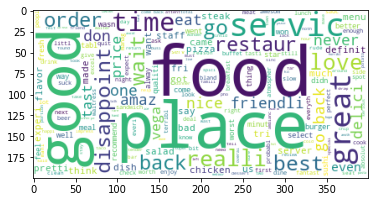

In [29]:
plt.imshow(wc_img)

## Vectorization

##### Bag Of Words


In [30]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

In [31]:
x=cv.fit_transform(corpus).toarray()

In [32]:
x.shape

(1000, 1578)

**1578** is no. of unique words

In [33]:
cv.get_feature_names()

['absolut',
 'absolutley',
 'accid',
 'accommod',
 'accomod',
 'accordingli',
 'account',
 'ach',
 'acknowledg',
 'across',
 'actual',
 'ad',
 'afford',
 'afternoon',
 'ago',
 'ahead',
 'airlin',
 'airport',
 'ala',
 'albondiga',
 'allergi',
 'almond',
 'almost',
 'alon',
 'also',
 'although',
 'alway',
 'amaz',
 'ambianc',
 'ambienc',
 'amount',
 'ampl',
 'andddd',
 'angri',
 'annoy',
 'anoth',
 'anticip',
 'anymor',
 'anyon',
 'anyth',
 'anytim',
 'anyway',
 'apart',
 'apolog',
 'app',
 'appal',
 'appar',
 'appeal',
 'appet',
 'appetit',
 'appl',
 'approv',
 'area',
 'arepa',
 'aria',
 'around',
 'array',
 'arriv',
 'articl',
 'ask',
 'assur',
 'ate',
 'atmospher',
 'atroci',
 'attach',
 'attack',
 'attent',
 'attitud',
 'auju',
 'authent',
 'averag',
 'avocado',
 'avoid',
 'aw',
 'away',
 'awesom',
 'awkward',
 'awkwardli',
 'ayc',
 'az',
 'baba',
 'babi',
 'bachi',
 'back',
 'bacon',
 'bad',
 'bagel',
 'bakeri',
 'baklava',
 'ball',
 'bamboo',
 'banana',
 'bank',
 'bar',
 'bare',
 

In [34]:
x_df=pd.DataFrame(x,columns=cv.get_feature_names())

In [35]:
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [36]:
y=data["Liked"]

### Train-Test Split

In [37]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

### Building ANN Model

In [38]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [39]:
#init nn model
model=Sequential()

In [40]:
#Input Layer
model.add(Dense(input_dim=1578,kernel_initializer="random_uniform",activation="relu",units=200))

In [41]:
#Hidden Layer
model.add(Dense(kernel_initializer="random_uniform",activation="relu",units=200))

In [42]:
#Output Layer
model.add(Dense(kernel_initializer="random_uniform",activation="sigmoid",units=1))

In [43]:
#Compile the model
model.compile(loss="binary_crossentropy",optimizer="adam",metrics=['accuracy'])

In [44]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 200)               315800    
_________________________________________________________________
dense_1 (Dense)              (None, 200)               40200     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 201       
Total params: 356,201
Trainable params: 356,201
Non-trainable params: 0
_________________________________________________________________


In [45]:
train_history=model.fit(x_train, y_train, batch_size=32,epochs=5)

Epoch 1/5
25/25 [==============================] - 0s 4ms/step - loss: 0.6872 - accuracy: 0.6300
Epoch 2/5
25/25 [==============================] - 0s 4ms/step - loss: 0.5389 - accuracy: 0.9175
Epoch 3/5
25/25 [==============================] - 0s 4ms/step - loss: 0.1757 - accuracy: 0.9638
Epoch 4/5
25/25 [==============================] - 0s 4ms/step - loss: 0.0463 - accuracy: 0.9900
Epoch 5/5
25/25 [==============================] - 0s 4ms/step - loss: 0.0184 - accuracy: 0.9975


In [46]:
y_pred=model.predict_classes(x_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [47]:
y_pred

array([[0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
    

# Evalute the model

In [49]:
from sklearn.metrics import accuracy_score

In [50]:
accuracy_score(y_test,y_pred)*100

79.0

# Real time Predictions

In [70]:
myreview="I don't like the food"

In [71]:
myreview=np.array([myreview])

In [72]:
myreview=cv.transform(myreview).toarray()

In [73]:
myreview

array([[0, 0, 0, ..., 0, 0, 0]])

In [74]:
myreview.shape

(1, 1578)

In [75]:
model.predict_classes(myreview)
#0 refers to negative review

array([[0]], dtype=int32)